In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
include("src/spiking.jl")
include("src/vsa.jl")

unbind (generic function with 2 methods)

In [3]:
using Plots

In [4]:
using StatsPlots: density

In [5]:
n_x = 101
n_y = 101
n_vsa = 1

1

In [6]:
repeats = 6

6

In [7]:
phases = collect([[x, y] for x in range(-1.0, 1.0, n_x), y in range(-1.0, 1.0, n_y)]) |> stack
phases = reshape(phases, (1,2,:));

In [8]:
b = bind(phases, dims=2);

In [9]:
ub = unbind(phases[1:1,1:1,:], phases[1:1,2:2,:]);

In [10]:
spk_args = SpikingArgs(t_window=0.01)

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.02 (V)


In [11]:
tspan = (0.0, repeats*1.0)

(0.0, 6.0)

In [12]:
tbase = collect(tspan[1]:spk_args.dt:tspan[2]);

In [13]:
st_x = phase_to_train(phases[1:1,1:1,:], spk_args, repeats = repeats)
st_y = phase_to_train(phases[1:1,2:2,:], spk_args, repeats = repeats)

Spike Train: (1, 1, 10201) with 61206 spikes.

In [14]:
st_x.shape

(1, 1, 10201)

In [15]:
st_x

Spike Train: (1, 1, 10201) with 61206 spikes.

In [16]:
uout = bind(st_x, st_y, tspan=tspan, return_solution=true);

# Binding

In [17]:
decoded = potential_to_phase(uout, tbase, dim=4, spk_args=spk_args);

In [18]:
err = (decoded[1,:,:,:] .- b[1,:,:]);

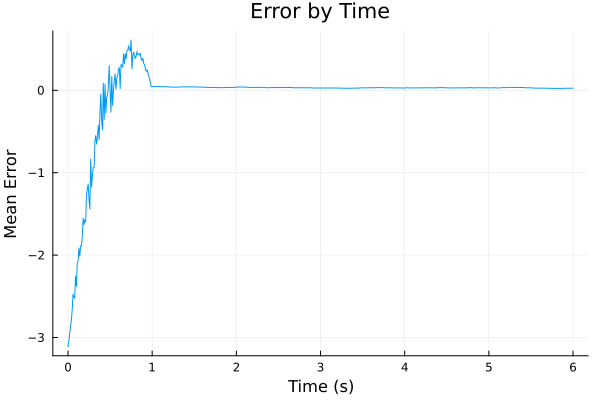

In [19]:
fig_time = plot(tbase, pi .* (mean(err, dims=2)) |> vec, label=missing)
ylabel!("Mean Error")
xlabel!("Time (s)")
title!("Error by Time")

In [20]:
png(fig_time, "figures/bind time error.png")

"bind time error.png"

In [21]:
b2 = bind(st_x, st_y, tspan=tspan, return_solution=false);

In [22]:
b2d = train_to_phase(b2, spk_args);

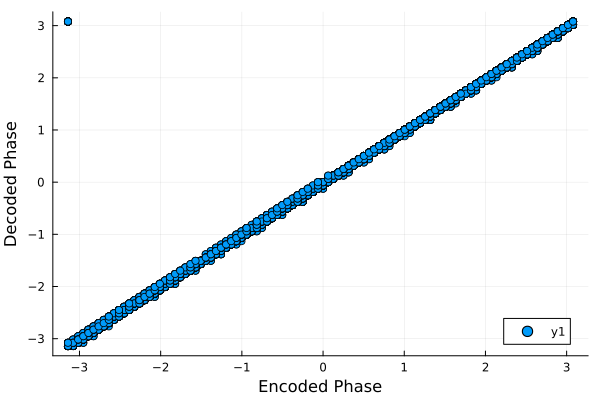

In [23]:
fig = scatter(pi .* b2d[5,:,:,:] |> vec, pi .* b |> vec)
xlabel!("Encoded Phase")
ylabel!("Decoded Phase")

In [24]:
png(fig, "figures/bind phase error.png")

"bind phase error.png"

In [25]:
enc_error = filter(x -> !isnan(x), vec(b2d[5,:,:,:]) .- vec(b));

In [26]:
mean(enc_error)

0.0016923529989201895

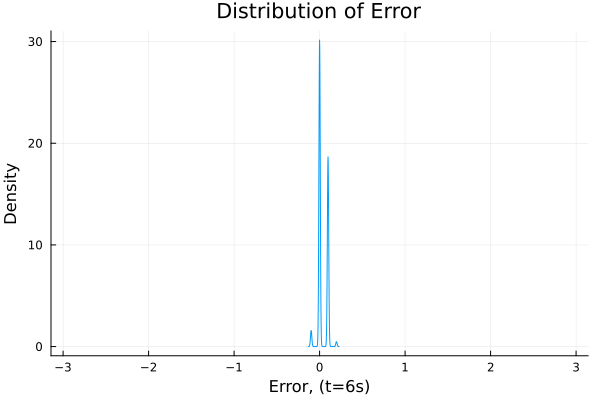

In [27]:
fig_density = density(pi .* sin.(0.5 .* pi .* enc_error), label=missing, xlims=(-pi, pi))
xlabel!("Error, (t=6s)")
ylabel!("Density")
title!("Distribution of Error")

In [28]:
png(fig_density, "figures/bind error density.png")

"bind error density.png"

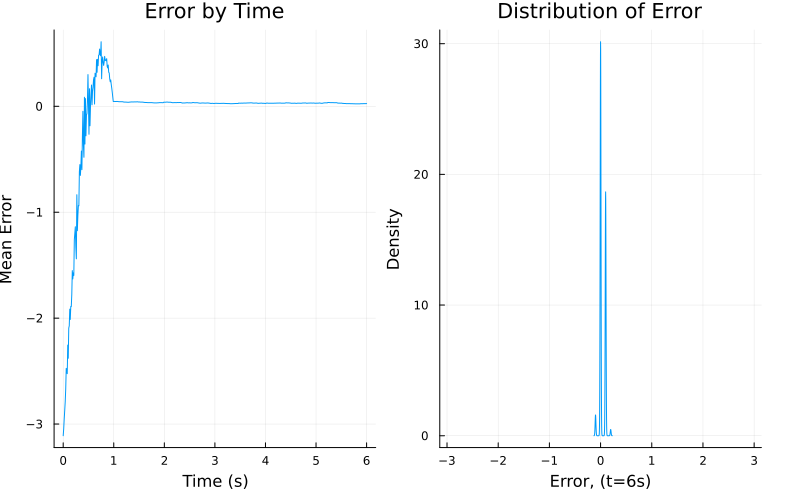

In [29]:
l = @layout[a{0.48w, 0.98h} b{0.48w, 0.98h}]
fig_joint = plot(fig_time, fig_density, layout = l, size=(800, 500))

In [30]:
png(fig_joint, "figures/binding joint fig.png")

"binding joint fig.png"

# Unbinding

In [31]:
ubout = unbind(st_x, st_y, tspan=tspan, return_solution=true);

In [32]:
decoded = potential_to_phase(ubout, tbase, dim=4, spk_args=spk_args);

In [33]:
err = (decoded[1,:,:,:] .- ub[1,:,:]);

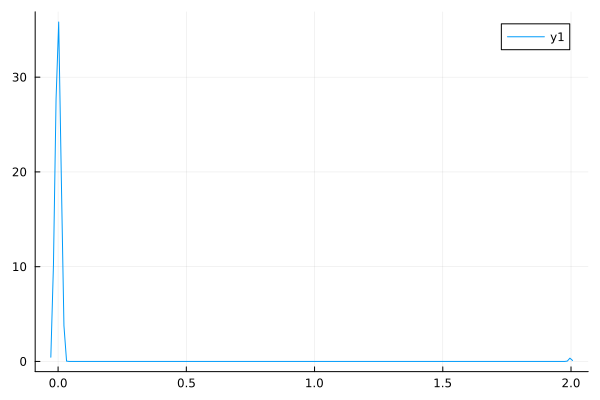

In [34]:
density(err[1,:,end])

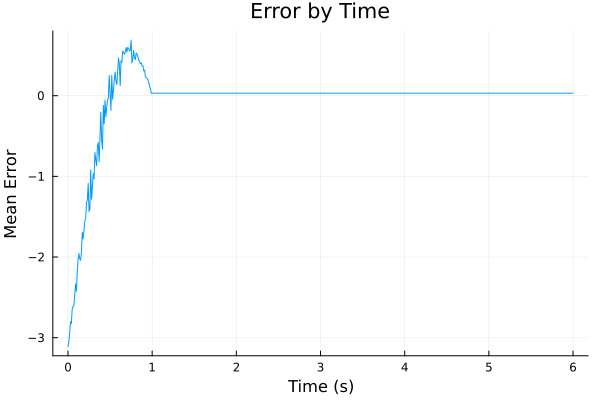

In [35]:
fig = plot(tbase, pi .* (mean(err, dims=2)) |> vec, label=missing)
ylabel!("Mean Error")
xlabel!("Time (s)")
title!("Error by Time")

In [36]:
png(fig, "figures/unbind time error.png")

"unbind time error.png"

In [37]:
ub2 = unbind(st_x, st_y, tspan=tspan, return_solution=false);

In [38]:
ub2d = train_to_phase(ub2, spk_args);

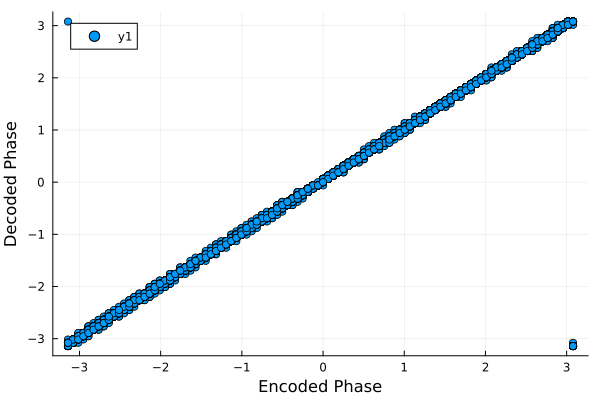

In [39]:
fig = scatter(pi .* ub2d[5,:,:,:] |> vec, pi .* ub |> vec)
xlabel!("Encoded Phase")
ylabel!("Decoded Phase")

In [40]:
png(fig, "figures/unbind phase error.png")

"unbind phase error.png"

In [41]:
enc_error = filter(x -> !isnan(x), vec(ub2d[5,:,:,:]) .- vec(ub));

In [42]:
enc_error |> mean

0.0001568935085310648

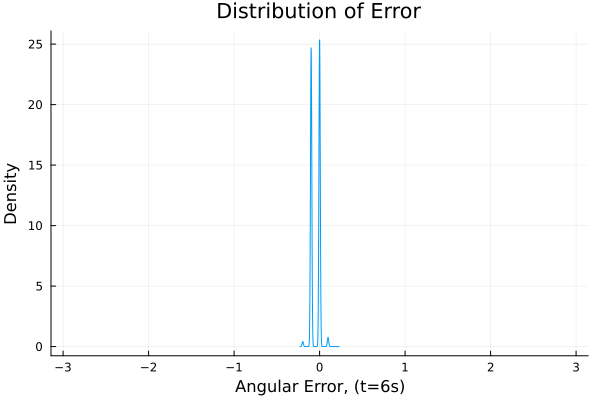

In [43]:
fig = density(pi .* sin.(0.5 .* pi .* enc_error), label=missing, xlims=(-pi, pi))
xlabel!("Angular Error, (t=6s)")
ylabel!("Density")
title!("Distribution of Error")

In [44]:
png(fig, "figures/unbind error density.png")

"unbind error density.png"